# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Understand Data

In [11]:
df = pd.read_csv("/Users/aaa/Documents/Product_EDA/data/raw/Product_DataSet.csv")


In [12]:
df.head()

,S.No,BrandName,Product ID,Product Name,Brand Desc,Product Size,Currancy,MRP,SellPrice,Discount,Category
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,Rs.,3900,3120,20% off,Fragrance-Women
1,2,109f,DRW1,DRW1 - Westernwear-Women,womens v- neck short dress - yellow,"Size:Medium,Small,X-Large,XX-Large",Rs.,1899,569,70% off,Westernwear-Women
2,3,109f,DRW2,DRW2 - Westernwear-Women,womens round neck solid top - black,"Size:Large,Medium,Small,X-Large",Rs.,1499,599,60% off,Westernwear-Women
3,4,109f,DRW3,DRW3 - Westernwear-Women,womens round neck stripe shift dress - red,"Size:Medium,Small",Rs.,1599,639,60% off,Westernwear-Women
4,5,109f,DRW4,DRW4 - Westernwear-Women,womens round neck solid high low top - black,"Size:Large,Medium,Small,X-Large",Rs.,1199,479,60% off,Westernwear-Women


In [13]:
df.shape

(4566, 11)

In [14]:
df.dtypes

S.No            int64
BrandName         str
Product ID        str
Product Name      str
Brand Desc        str
Product Size      str
Currancy          str
MRP               str
SellPrice       int64
Discount          str
Category          str
dtype: object

In [15]:
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df['SellPrice'] = pd.to_numeric(df['SellPrice'], errors='coerce')


In [16]:
df['SellPrice'] = df['SellPrice'].astype(float)

In [17]:
df['Discount'] = (df['Discount'].str.extract(r'(\d+)').astype(int))
df.rename(columns={'Discount': 'Discount_Percentage %'}, inplace=True)


In [18]:
df.dtypes

S.No                       int64
BrandName                    str
Product ID                   str
Product Name                 str
Brand Desc                   str
Product Size                 str
Currancy                     str
MRP                      float64
SellPrice                float64
Discount_Percentage %      int64
Category                     str
dtype: object

In [19]:
df.describe()

,S.No,MRP,SellPrice,Discount_Percentage %
count,4566.000000,4548.000000,4566.000000,4566.000000
mean,2283.500000,1822.885840,2005.222733,29.991897
std,1318.234994,2281.270513,2259.614915,17.856129
min,1.000000,0.000000,89.000000,5.000000
25%,1142.250000,9.000000,749.000000,10.000000
50%,2283.500000,1495.000000,1379.000000,30.000000
75%,3424.750000,2499.000000,2299.000000,50.000000
max,4566.000000,28495.000000,25995.000000,80.000000


### Data Cleaning And Preprocessing

In [20]:
#df.rename(columns={'Currancy': 'Currency'}, inplace=True)
df.drop(columns=['Currancy'], inplace=True)
df.rename(columns={'Product ID': 'Product_ID'}, inplace=True)
df.rename(columns={'Product Name': 'Product_Name'}, inplace=True)
df.rename(columns={'Brand Desc': 'Product_Desc'}, inplace=True)
df.rename(columns={'Product Size': 'Product_Size'}, inplace=True)
df.rename(columns={'MRP': 'MRP (Rs.)'}, inplace=True)
df.rename(columns={'SellPrice': 'SellPrice (Rs.)'}, inplace=True)


In [21]:
df['Product_Size'] = df['Product_Size'].str.replace('Size:', '', regex=False)
df['Product_Size'] = df['Product_Size'].str.strip()
df['Category'] = df['Category'].str.replace('-Women', '', regex=False)

In [22]:
df.head()

,S.No,BrandName,Product_ID,Product_Name,Product_Desc,Product_Size,MRP (Rs.),SellPrice (Rs.),Discount_Percentage %,Category
0,1,4711,FR001,Cologne Fragrance,ekw eau de cologne 400 ml,Small,3900.0,3120.0,20,Fragrance
1,2,109f,DRW1,DRW1 - Westernwear-Women,womens v- neck short dress - yellow,"Medium,Small,X-Large,XX-Large",1899.0,569.0,70,Westernwear
2,3,109f,DRW2,DRW2 - Westernwear-Women,womens round neck solid top - black,"Large,Medium,Small,X-Large",1499.0,599.0,60,Westernwear
3,4,109f,DRW3,DRW3 - Westernwear-Women,womens round neck stripe shift dress - red,"Medium,Small",1599.0,639.0,60,Westernwear
4,5,109f,DRW4,DRW4 - Westernwear-Women,womens round neck solid high low top - black,"Large,Medium,Small,X-Large",1199.0,479.0,60,Westernwear


In [23]:
df.isnull().sum()

S.No                      0
BrandName                 0
Product_ID                0
Product_Name              0
Product_Desc              0
Product_Size              0
MRP (Rs.)                18
SellPrice (Rs.)           0
Discount_Percentage %     0
Category                  0
dtype: int64

In [24]:
df['Discount_Percentage %'].min()

np.int64(5)

In [25]:
df.describe()

,S.No,MRP (Rs.),SellPrice (Rs.),Discount_Percentage %
count,4566.000000,4548.000000,4566.000000,4566.000000
mean,2283.500000,1822.885840,2005.222733,29.991897
std,1318.234994,2281.270513,2259.614915,17.856129
min,1.000000,0.000000,89.000000,5.000000
25%,1142.250000,9.000000,749.000000,10.000000
50%,2283.500000,1495.000000,1379.000000,30.000000
75%,3424.750000,2499.000000,2299.000000,50.000000
max,4566.000000,28495.000000,25995.000000,80.000000


In [26]:
df['MRP (Rs.)'].value_counts().sort_index()

MRP (Rs.)
0.0        114
0.5         70
0.8         26
0.9        174
2.5          7
          ... 
21500.0      1
22000.0      1
22500.0      1
22995.0      3
28495.0      1
Name: count, Length: 287, dtype: int64

In [27]:
category_price_summary = df.groupby('Category')['MRP (Rs.)'].agg(
    Min_Price='min',
    Avg_Price='mean',
    Max_Price='max',
    Count='count'
).reset_index()

category_price_summary.sort_values('Min_Price').head(10)


,Category,Min_Price,Avg_Price,Max_Price,Count
1,Fragrance,0.0,1281.695513,8000.0,156
2,Indianwear,0.0,1332.829307,8995.0,1126
5,Watches,0.0,6365.054711,28495.0,329
4,Lingerie&Nightwear,0.0,751.410082,3999.0,367
3,Jewellery,0.8,706.821233,4399.0,438
6,Westernwear,0.9,1774.635714,5999.0,1652
0,Footwear,8.9,2038.787708,8999.0,480


In [28]:
category_price_summary = df.groupby('Category')['SellPrice (Rs.)'].agg(
    Min_Price='min',
    Avg_Price='mean',
    Max_Price='max',
    Count='count'
).reset_index()

category_price_summary.sort_values('Min_Price').head(10)

,Category,Min_Price,Avg_Price,Max_Price,Count
3,Jewellery,89.0,581.632420,4179.0,438
4,Lingerie&Nightwear,114.0,649.196185,3600.0,367
2,Indianwear,125.0,1854.618921,11200.0,1131
1,Fragrance,195.0,3064.508982,10000.0,167
6,Westernwear,199.0,1443.969770,5499.0,1654
0,Footwear,599.0,2583.483333,9999.0,480
5,Watches,1995.0,7371.100304,25995.0,329


In [29]:
df[df['MRP (Rs.)'] < df['SellPrice (Rs.)']]

,S.No,BrandName,Product_ID,Product_Name,Product_Desc,Product_Size,MRP (Rs.),SellPrice (Rs.),Discount_Percentage %,Category
144,145,aarke,AARKE29,AARKE29 - Indianwear-Women,printed rayon blend round neck womens ethnic s...,"Large,Medium,Small,X-Large",0.0,4700.0,10,Indianwear
145,146,aarke,AARKE30,AARKE30 - Indianwear-Women,printed rayon blend round neck womens ethnic s...,"Large,Medium,X-Large",0.0,3900.0,10,Indianwear
146,147,aarke,AARKE31,AARKE31 - Indianwear-Women,printed square neck cotton blend womens dress ...,"Large,Medium,Small,X-Small",0.0,2900.0,10,Indianwear
147,148,aarke,AARKE32,AARKE32 - Indianwear-Women,printed cowl neck polyester blend womens long ...,"Medium,Small,X-Small",0.0,3400.0,10,Indianwear
148,149,aarke,AARKE33,AARKE33 - Indianwear-Women,printed round neck cotton blend womens dress -...,"Large,Medium,Small,X-Small",0.0,2900.0,10,Indianwear
...,...,...,...,...,...,...,...,...,...,...
4422,4423,cover story,COVER STORY15,COVER STORY15 - Westernwear-Women,printed polyester v neck womens dress - black,"Large,Medium,Small,X-Large,X-Small",9.0,2990.0,10,Westernwear
4432,4433,cover story,COVER STORY25,COVER STORY25 - Westernwear-Women,solid regular polyester womens casual wear tro...,"26,28,30,32,34",9.0,2590.0,10,Westernwear
4433,4434,cover story,COVER STORY26,COVER STORY26 - Westernwear-Women,solid blended v neck womens t-shirt - grey,"Large,Medium,Small,X-Large,X-Small",9.0,1490.0,10,Westernwear
4440,4441,cover story,COVER STORY33,COVER STORY33 - Westernwear-Women,solid poly blend collar neck womens top - purple,"Large,Medium,Small,X-Large,X-Small",9.0,1490.0,10,Westernwear


In [30]:
df['MRP (Rs.)'] = df['MRP (Rs.)'].where(
    df['MRP (Rs.)'] >= df['SellPrice (Rs.)'],
    df['SellPrice (Rs.)'] / (1 - df['Discount_Percentage %'] / 100)
)

In [31]:
df = df[['BrandName', 'Product_ID', 'Product_Name','Category','MRP (Rs.)','SellPrice (Rs.)','Discount_Percentage %','Product_Desc']]


In [32]:
df.head()

,BrandName,Product_ID,Product_Name,Category,MRP (Rs.),SellPrice (Rs.),Discount_Percentage %,Product_Desc
0,4711,FR001,Cologne Fragrance,Fragrance,3900.0,3120.0,20,ekw eau de cologne 400 ml
1,109f,DRW1,DRW1 - Westernwear-Women,Westernwear,1899.0,569.0,70,womens v- neck short dress - yellow
2,109f,DRW2,DRW2 - Westernwear-Women,Westernwear,1499.0,599.0,60,womens round neck solid top - black
3,109f,DRW3,DRW3 - Westernwear-Women,Westernwear,1599.0,639.0,60,womens round neck stripe shift dress - red
4,109f,DRW4,DRW4 - Westernwear-Women,Westernwear,1199.0,479.0,60,womens round neck solid high low top - black


### Statistical Analysis

In [33]:
df['MRP (Rs.)'].mean()

np.float64(2698.335834915073)

In [34]:
df['SellPrice (Rs.)'].mean()

np.float64(2005.2227332457294)

In [35]:
print(f"Total Products: {len(df):,}")
print(f"Total Brands: {df['BrandName'].nunique()}")
print(f"Total Categories: {df['Category'].nunique()}")

Total Products: 4,566
Total Brands: 57
Total Categories: 7


In [36]:
print(f"Average: {df['SellPrice (Rs.)'].mean():,.0f}")
print(f"Median: {df['SellPrice (Rs.)'].median():,.0f}")
print(f"Min: {df['SellPrice (Rs.)'].min():,.0f}")
print(f"Max: {df['SellPrice (Rs.)'].max():,.0f}")
print(f"Std Dev: {df['SellPrice (Rs.)'].std():,.0f}")

Average: 2,005
Median: 1,379
Min: 89
Max: 25,995
Std Dev: 2,260


In [37]:
print(f"Average Discount: {df['Discount_Percentage %'].mean():.1f}%")
print(f"Median Discount: {df['Discount_Percentage %'].median():.1f}%")
print(f"Min Discount: {df['Discount_Percentage %'].min()}%")
print(f"Max Discount: {df['Discount_Percentage %'].max()}%")

Average Discount: 30.0%
Median Discount: 30.0%
Min Discount: 5%
Max Discount: 80%


In [38]:
print("STATISTICS BY CATEGORY")

category_summary = df.groupby('Category').agg({
    'Product_ID': 'count',
    'SellPrice (Rs.)': ['mean', 'median', 'min', 'max'],
    'Discount_Percentage %': 'mean'
}).round(2)

category_summary.columns = ['Count', 'Avg_Price', 'Med_Price', 'Min_Price', 'Max_Price', 'Avg_Disc%']

print(category_summary.to_string())

STATISTICS BY CATEGORY
                    Count  Avg_Price  Med_Price  Min_Price  Max_Price  Avg_Disc%
Category                                                                        
Footwear              480    2583.48     1899.0      599.0     9999.0      28.72
Fragrance             167    3064.51     1725.0      195.0    10000.0      15.18
Indianwear           1131    1854.62     1498.0      125.0    11200.0      25.03
Jewellery             438     581.63      359.0       89.0     4179.0      40.17
Lingerie&Nightwear    367     649.20      545.0      114.0     3600.0      36.32
Watches               329    7371.10     6565.0     1995.0    25995.0      21.19
Westernwear          1654    1443.97     1349.0      199.0     5499.0      32.90


In [39]:
print("STATISTICS BY Price")

category_summary = df.groupby('BrandName').agg({
    'SellPrice (Rs.)': ['mean', 'median', 'min', 'max'],
    'Discount_Percentage %': 'mean'
}).round(2)

category_summary.columns = ['Avg_Price', 'Med_Price', 'Min_Price', 'Max_Price', 'Avg_Disc%']

category_summary = category_summary.sort_values(
    by='Avg_Disc%',
    ascending=False
)

print(category_summary.to_string())

STATISTICS BY Price
                         Avg_Price  Med_Price  Min_Price  Max_Price  Avg_Disc%
BrandName                                                                     
clovia                      339.14      249.0      114.0     1599.0      52.86
altlife                     373.53      299.0      199.0      799.0      48.51
ayesha                      490.71      349.0       89.0     3598.0      45.76
109f                       1025.58      779.0      399.0     2599.0      43.79
amukti                      809.11      799.0      489.0     1499.0      42.47
crimsoune club             1080.00     1019.0      649.0     1609.0      40.00
catwalk                    1656.14     1596.0      599.0     4396.0      35.55
cover story                1477.45     1383.5      445.0     3493.0      34.05
biba                       2218.39     1979.0      125.0     7995.0      32.59
and                        1716.50     1519.0      400.0     5499.0      32.20
allen solly                1401.

In [40]:
print("TOP 10 BRANDS BY PRODUCT COUNT")

brand_summary = df.groupby('BrandName').agg({
    'Product_ID': 'count',
}).round(0)

brand_summary.columns = ['Count']
brand_summary = brand_summary.sort_values('Count', ascending=False).head(10)

print(brand_summary.to_string())

TOP 10 BRANDS BY PRODUCT COUNT
             Count
BrandName         
and            709
aurelia        486
ayesha         381
biba           290
adidas         248
allen solly    239
catwalk        237
casio          198
amante         193
altlife        161


In [41]:
print("MRP vs SELLPRICE (Cleaned Data)")

profit_margin = ((df['MRP (Rs.)'] - df['SellPrice (Rs.)']) / df['MRP (Rs.)'] * 100).round(1)

print(f"Average MRP: {df['MRP (Rs.)'].mean():,.0f}")
print(f"Average SellPrice: {df['SellPrice (Rs.)'].mean():,.0f}")
print(f"Average Profit Margin: {profit_margin.mean():.1f}%")


MRP vs SELLPRICE (Cleaned Data)
Average MRP: 2,698
Average SellPrice: 2,005
Average Profit Margin: 30.0%


In [42]:
# Most expensive category
exp_cat = df.groupby('Category')['SellPrice (Rs.)'].mean().idxmax()
exp_price = df.groupby('Category')['SellPrice (Rs.)'].mean().max()

# Cheapest category
cheap_cat = df.groupby('Category')['SellPrice (Rs.)'].mean().idxmin()
cheap_price = df.groupby('Category')['SellPrice (Rs.)'].mean().min()

# Most discounted category
disc_cat = df.groupby('Category')['Discount_Percentage %'].mean().idxmax()
disc_pct = df.groupby('Category')['Discount_Percentage %'].mean().max()

# Least discounted category
less_disc_cat = df.groupby('Category')['Discount_Percentage %'].mean().idxmin()
less_disc_pct = df.groupby('Category')['Discount_Percentage %'].mean().min()

print(f"Most Expensive: {exp_cat} ({exp_price:,.0f} avg)")
print(f"Most Affordable: {cheap_cat} ({cheap_price:,.0f} avg)")
print(f"Highest Discounts: {disc_cat} ({disc_pct:.1f}% avg)")
print(f"Lowest Discounts: {less_disc_cat} ({less_disc_pct:.1f}% avg)")


Most Expensive: Watches (7,371 avg)
Most Affordable: Jewellery (582 avg)
Highest Discounts: Jewellery (40.2% avg)
Lowest Discounts: Fragrance (15.2% avg)


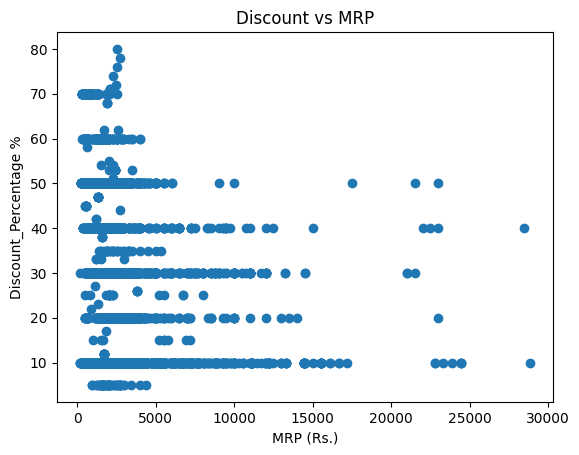

In [43]:
plt.figure()

plt.scatter(df['MRP (Rs.)'], df['Discount_Percentage %'])

plt.xlabel('MRP (Rs.)')
plt.ylabel('Discount_Percentage %')
plt.title('Discount vs MRP')

plt.show()

In [44]:
df.to_csv("/Users/aaa/Documents/Product_EDA/data/processed/Cleaned_Product_dataset.csv", index=False)